# Welcome to an example Binder

This notebook loads example files from both S3 and GCE to show that remote data is accessible from within a Binder. In both cases, we're loading example data from the `binder-sample-data` bucket on S3, or the `binder-sample-data` bucket on GS. Both buckets and the files within have been set to public. The S3 examples use `boto`, whereas the GS examples use GET requests. This is because anonymous access to GS is not yet properly supported via `boto`.

## Setup imports

In [11]:
from boto.s3.connection import S3Connection
import requests
from io import BytesIO
from PIL import Image
import pandas as pd

## Load an image (from S3)

To use `boto` to load our data, we start by making an `S3Connection`. Because the data are public, we set `anon` to `True`. (NOTE: currently passing empty strings as credentials to prevent a weird bug where `boto` tries and fails to pull credentials automatically, this may be specific to running in GCE.)

In [3]:
conn = S3Connection('', '', anon=True)

Get the bucket

In [4]:
bucket = conn.get_bucket('binder-sample-data')

Get the key to the image file

In [5]:
key = bucket.get_key('sample-image.png')

Load the contents into a buffer and load into an image

In [6]:
raw = key.get_contents_as_string()
buf = BytesIO(raw)
im = Image.open(buf)

Show our image using Jupyter's rich display system!

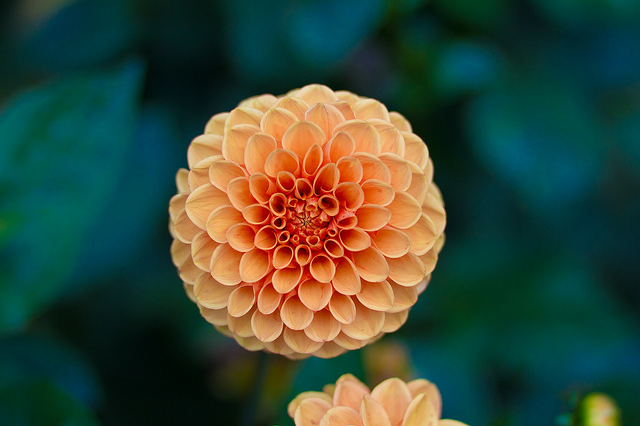

In [7]:
im

## Load a table (from S3)

We're going to do something very similar, but for a table stored as CSV

First get the bucket and key as before

In [8]:
bucket = conn.get_bucket('binder-sample-data')
key = bucket.get_key('sample-table.csv')

Now load the file into a byte buffer

In [9]:
blob = BytesIO(key.get_contents_as_string())

And read it into pandas

In [12]:
data = pd.read_csv(blob)

And display with the rich display system

In [13]:
data.head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


## Load an image (from GS)

For a final example, we'll load data from Google Storage. Unfortunately there is no simple `anon` option for using GS with `boto`, but we can simple use a `GET` with the `requests` library if the data is public.

In [15]:
r = requests.get('https://storage.googleapis.com/binder-example-data/sample-image.png')

Load the data into a byte buffer and open as an image

In [18]:
buf = BytesIO(r.content)
im = Image.open(buf)

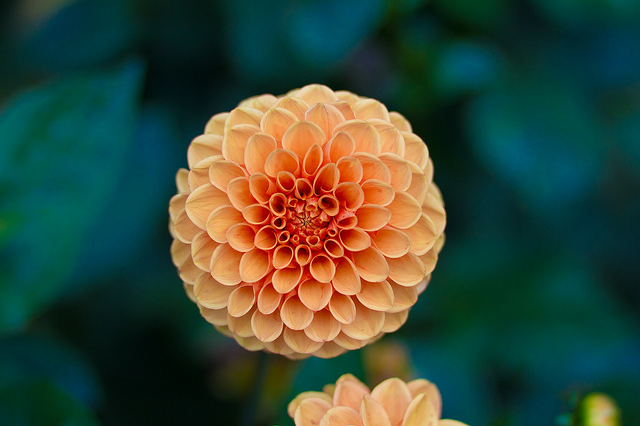

In [19]:
im